# <span style="color:#5E002B">Machine learning: una demostración en Python</span>

---

### Algoritmo de reconocimiento de números manuscritos

Rodrigo Leo | Julio 2021

### Top Machine Learning Languages on GitHub

1. <mark>Python</mark>
1. C++
1. JavScript
1. Java
1. C#
1. Julia
1. Shell
1. R
1. TypeScript
1. Scala

Fuente: *[The State of the Octoverse: machine learning](https://github.blog/2019-01-24-the-state-of-the-octoverse-machine-learning/)*, del [blog oficial de GitHub](https://github.blog).

### Packages Imported by Machine Learning Projects on GitHub

1. <mark>numpy</mark>
1. scipy
1. pandas
1. <mark>matplotlib</mark>
1. <mark>scikit-learn</mark>
1. six
1. tensorflow
1. requests
1. python-dateutil
1. pytz

Fuente: *[The State of the Octoverse: machine learning](https://github.blog/2019-01-24-the-state-of-the-octoverse-machine-learning/)*, del [blog oficial de GitHub](https://github.blog).

### Objetivo

* ML trata de resolver dos clases de problemas:
    * Problemas de *clasificación*
    * Problemas de *regresión*


* En este proyecto emplearemos Python y la librería scikit-learn (`sklearn`) para implementar un algoritmo ML capaz de identificar números manuscritos.

* Usaremos la base de datos de reconocimiento óptico de caracteres manuscritos publicada en 1998 y conservada por la UC Irvine. Esta es una base de datos "clásica" para entrenar algoritmos de aprendizaje automático.

https://archive-beta.ics.uci.edu/ml/datasets/80

### 1. Importar paquetes y base de datos
---

In [1]:
# Importar las librerías requeridas: scikit-learn (sklearn), numpy y matplotlib:

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


# Cargar la base de datos de números manuscritos en la variable 'digitos':

digitos = datasets.load_digits()

In [2]:
# La propiedad data.shape de la base de datos devuelve su tamaño:

digitos.data.shape

(1797, 64)

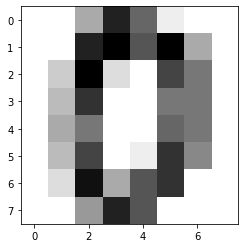

In [3]:
# Visualización del primer elemento de la base de datos:

plt.imshow(digitos.images[0], cmap = "gray_r")
plt.show()

### 2. Explorar la base de datos
---

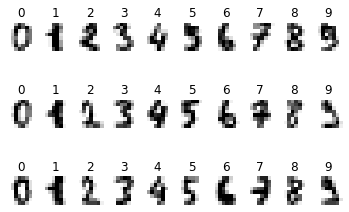

In [4]:
# Mostrar los primeros 30 números de la base de datos:

n = 0
fig, axs = plt.subplots(3, 10)

for (x, y) in [(x, y) for x in range(0, 3) for y in range(0, 10)]:
    axs[x, y].imshow(digitos.images[n], cmap = "gray_r")
    axs[x, y].axis("off")
    axs[x, y].set_title(digitos.target[n])
    n = n + 1

In [5]:
# Definimos una función auxiliar para filtrar y mostrar los primeros 30 elementos de un número dado:

def on_value_change(change):
    clear_output()
    subset = np.where(digitos.target == change['new'])
    fig, axs = plt.subplots(3, 10)
    n = 0
    for (x, y) in [(x, y) for x in range(0, 3) for y in range(0, 10)]:
        axs[x, y].imshow(digitos.images[subset][n], cmap = "gray_r")
        axs[x, y].axis("off"); n = n + 1
    display(objetivo)
    plt.plot()

In [6]:
# Importar la libería de widgets e insertar un wodget que controla el número a mostrar:

import ipywidgets as widgets
from IPython.display import display, clear_output

objetivo = widgets.IntText(value = 0, description='Número:', disabled=False)
objetivo.observe(on_value_change, names='value')
display(objetivo)

IntText(value=0, description='Número:')

### 3. Dividir la muestra
---

La base de datos contiene 1797 observaciones. La dividiremos en dos partes:

* Una parte es el *training set*, que se usa para "entrenar" el modelo de ML y "enseñarle" a reconocer patrones de números manuscritos.
* Otra parte es el *evaluation set*, que se usa para verificar si el modelo "aprendió" a hacer su trabajo correctamente.

Reservaremos las últimas 250 observaciones para probar el modelo (*evaluation set*), mientras que las `1797 - 250 = 1547` observaciones restantes serán empleadas para entrenar el modelo (*training set*).

In [7]:
# El diccionario 'trainig_set' contiene los datos para entrenar los modelos
# Consiste en todas las observaciones, excepto las últimas 250

training_set = {
    'datos'    : digitos.data[:-250],
    'etiquetas': digitos.target[:-250],
    'imagenes' : digitos.images[:-250]
}


# El diccionario 'evaluation_set' contiene los datos para evaluar la exactitud de los modelos
# Consiste en las últimas 250 observaciones de la base de datos

evaluation_set = {
    'datos'    : digitos.data[-250:],
    'etiquetas': digitos.target[-250:],
    'imagenes' : digitos.images[-250:]
}

### 4. Construir los modelos de ML
---

Probaremos cinco modelos de clasificación distintos:

1. Árbol de decisión (`DecisionTreeClassifier`).
1. Máquina de vectores de soporte (`SVC`, de *Support Vector Classifier*).
1. Análisis discriminante lineal (`LinearDiscriminantAnalysis`).
1. Descenso por gradiente estocástico (`SGDClassifier`, de *Stochastic Gradient Descent*).
1. Red  neuronal (perceptrón) (`MLPClassifier`, de *Multi-layer Perceptron*).

Cada modelo será calibrado usando el `training_set` y posteriormente evaluado usando el `evaluation_set`. Para cada modelo se obtendrá el *score*: la proporción de dígitos correctamente identificados.

In [8]:
scores = {}

#### Modelo 1: árbol de decisión
---

In [9]:
# Importar clasificador:
from sklearn.tree import DecisionTreeClassifier

# Construir y ajustar modelo:
modelo_dtc = DecisionTreeClassifier(random_state = 0)
modelo_dtc.fit(training_set['datos'], training_set['etiquetas'])

# Ejecutar modelo sobre el evaluation set y calcular el score:
predic_dtc = modelo_dtc.predict(evaluation_set['datos'])
score_dtc = accuracy_score(evaluation_set['etiquetas'], predic_dtc) * 100

# Guardar score
scores["dtc"] = score_dtc
print(score_dtc)

73.6


#### Modelo 2: máquina de vectores de soporte
---

In [10]:
# Importar clasificador:
from sklearn.svm import SVC

# Construir y ajustar modelo:
modelo_svc = SVC(random_state = 0)
modelo_svc.fit(training_set['datos'], training_set['etiquetas'])

# Ejecutar modelo sobre el evaluation set y calcular el score:
predic_svc = modelo_svc.predict(evaluation_set['datos'])
score_svc = accuracy_score(evaluation_set['etiquetas'], predic_svc) * 100

# Guardar score
scores["svc"] = score_svc
print(score_svc)

92.0


#### Modelo 3: análisis discriminante lineal
---

In [11]:
# Importar clasificador:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Construir y ajustar modelo:
modelo_lda = LinearDiscriminantAnalysis()
modelo_lda.fit(training_set['datos'], training_set['etiquetas'])

# Ejecutar modelo sobre el evaluation set y calcular el score:
predic_lda = modelo_lda.predict(evaluation_set['datos'])
score_lda = accuracy_score(evaluation_set['etiquetas'], predic_lda) * 100

# Guardar score
scores["lda"] = score_lda
print(score_lda)

89.2


#### Modelo 4: descenso por gradiente estocástico
---

In [12]:
# Importar clasificador:
from sklearn.linear_model import SGDClassifier

# Construir y ajustar modelo:
modelo_sgd = SGDClassifier(random_state = 0)
modelo_sgd.fit(training_set['datos'], training_set['etiquetas'])

# Ejecutar modelo sobre el evaluation set y calcular el score:
predic_sgd = modelo_sgd.predict(evaluation_set['datos'])
score_sgd = accuracy_score(evaluation_set['etiquetas'], predic_sgd) * 100

# Guardar score
scores["sgd"] = score_sgd
print(score_sgd)

87.2


#### Modelo 5: red neuronal (perceptrón multicapa)
---

In [13]:
# Importar clasificador:
from sklearn.neural_network import MLPClassifier

# Construir y ajustar modelo:
modelo_mlp = MLPClassifier(random_state = 0)
modelo_mlp.fit(training_set['datos'], training_set['etiquetas'])

# Ejecutar modelo sobre el evaluation set y calcular el score:
predic_mlp = modelo_mlp.predict(evaluation_set['datos'])
score_mlp = accuracy_score(evaluation_set['etiquetas'], predic_mlp) * 100

# Guardar score
scores["mlp"] = score_mlp
print(score_mlp)

90.4


#### Resumen: *scores* de los modelos ajustados
---

Los scores de cada modelo están almacenados en el diccionario `scores`. La siguiente rutina los muestra en un solo paso:

In [14]:
# Calcular promedio de los scores:

scores["(AVG)"] = sum(scores.values()) / len(scores)


# Mostrar scores:

print("Modelo\tExactitud")
print("-----------------")

for modelo in scores:
    print(modelo, "\t", round(scores[modelo], 1), "%")

Modelo	Exactitud
-----------------
dtc 	 73.6 %
svc 	 92.0 %
lda 	 89.2 %
sgd 	 87.2 %
mlp 	 90.4 %
(AVG) 	 86.5 %


### 5. Elegir un modelo: ensamblando algoritmos
---

Cada modelo tiene sus pros y sus contras. A veces, el modelo óptimo no es uno solo de ellos, sino más bien un *ensamble* de modelos, que no es otra cosa que un algoritmo que selecciona de forma secuencial el modelo más acertado en cada paso del proceso de entrenamiento.

Existen muchos tipos de algoritmos de ensamble. Nosotros usaremos uno muy simple: un algoritmo de votación.

Un algoritmo de votación funciona eligiendo como resultado la predicción más frecuente. Por ejemplo: supongamos que tenemos tres modelos ML ($I$, $II$ y $III$) que hacen las siguientes predicciones:

* $I \longrightarrow A$
* $II \longrightarrow B$
* $III \longrightarrow A$

Entonces, el algoritmo de votación elegirá la predicción $A$. Este es un ejemplo de ensamble sencillo.

Aplicaremos un ensamble de votación sobre nuestros cinco modelos para ver si es posible obtener un mejor resultado.

In [15]:
# Importar algoritmo de ensamble:
from sklearn.ensemble import VotingClassifier

# Lista de modelos a incluir en el ensamble:
modelos = [
    ("svc", SVC(random_state = 0)),
    ("lda", LinearDiscriminantAnalysis()),
    ("sgd", SGDClassifier(random_state = 0)),
    ("mpl", MLPClassifier(random_state = 0)),
    ("dtc", KNeighborsClassifier())
]

# Construir y ajustar ensamble:
modelo_ens = VotingClassifier(modelos, verbose = True)
modelo_ens.fit(training_set['datos'], training_set['etiquetas'])

# Ejecutar ensamble sobre el evaluation set y calcular el score:
predic_ens = modelo_ens.predict(evaluation_set['datos'])
score_ens = accuracy_score(evaluation_set['etiquetas'], predic_ens) * 100

# Guardar score:
scores["ens"] = score_ens
print(score_ens)

[Voting] ...................... (1 of 5) Processing svc, total=   0.1s
[Voting] ...................... (2 of 5) Processing lda, total=   0.0s
[Voting] ...................... (3 of 5) Processing sgd, total=   0.1s
[Voting] ...................... (4 of 5) Processing mpl, total=   0.9s
[Voting] ...................... (5 of 5) Processing dtc, total=   0.0s
93.2


#### *Scores* de los modelos ajustados, incluyendo el ensamble
---

Volvemos a mostrar los *scores* de los modelos, incluyendo el del ensamble de votación:

In [16]:
print("Modelo\tExactitud")
print("-----------------")

for modelo in scores:
    print(modelo, "\t", round(scores[modelo], 1), "%")

Modelo	Exactitud
-----------------
dtc 	 73.6 %
svc 	 92.0 %
lda 	 89.2 %
sgd 	 87.2 %
mlp 	 90.4 %
(AVG) 	 86.5 %
ens 	 93.2 %


¿Cómo se interpreta este resultado?

### 6. Conclusión: revisando dónde se equivoca el modelo
---

In [17]:
# Lista para almacenar los números de las observaciones equivocadas:
errores = []

# Iteramos sobre las observaciones para encontrar las equivocadas:
for obs in range(0, len(predic_ens)):
    if predic_ens[obs] != evaluation_set['etiquetas'][obs]:
        errores.append(obs)

# Número de equivocaciones cometidas por el modelo vs. número total de observaciones:
print(len(errores), "errores cometidos")
print(len(predic_ens), "observaciones totales")
print("Exactitud del modelo:", str((1 - len(errores) / len(predic_ens)) * 100))

17 errores cometidos
250 observaciones totales
Exactitud del modelo: 93.19999999999999


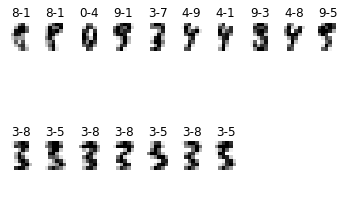

In [18]:
# Rutina para mostrar las imágenes de dígitos clasificados incorrectamente por el modelo:

n = 0
fig, axs = plt.subplots(2, 10)

for (x, y) in [(x, y) for x in range(0, 2) for y in range(0, 10)]:
    try:
        axs[x, y].imshow(evaluation_set['imagenes'][errores[n]], cmap = "gray_r")
        axs[x, y].axis("off")
        axs[x, y].set_title(str(evaluation_set['etiquetas'][errores[n]]) + "-" + str(predic_ens[errores[n]]))
        n = n + 1
    except:
        axs[x, y].axis("off")

In [19]:
from joblib import dump, load

dump(modelo_ens, 'ensamble.joblib')

['ensamble.joblib']

# <span style="color:#5E002B">Machine learning: una demostración en Python</span>

---

### Algoritmo de reconocimiento de números manuscritos

Rodrigo Leo | Julio 2021

rleo@colmex.mx